In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout #dropout overfit huna didaena

In [3]:
from keras.optimizers import SGD #for costomizing error

In [4]:
from keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) =mnist.load_data()

In [6]:
x_test.shape    #sample, y-grid, x-grid

(10000, 28, 28)

In [7]:
x_train.shape

(60000, 28, 28)

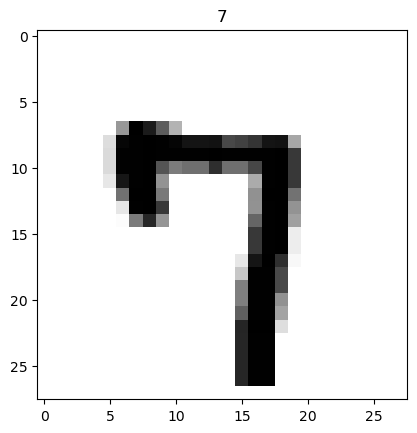

In [8]:
image_index = 4897
plt.title(y_train[image_index])
plt.imshow(x_train[image_index], plt.cm.binary)
plt.show()

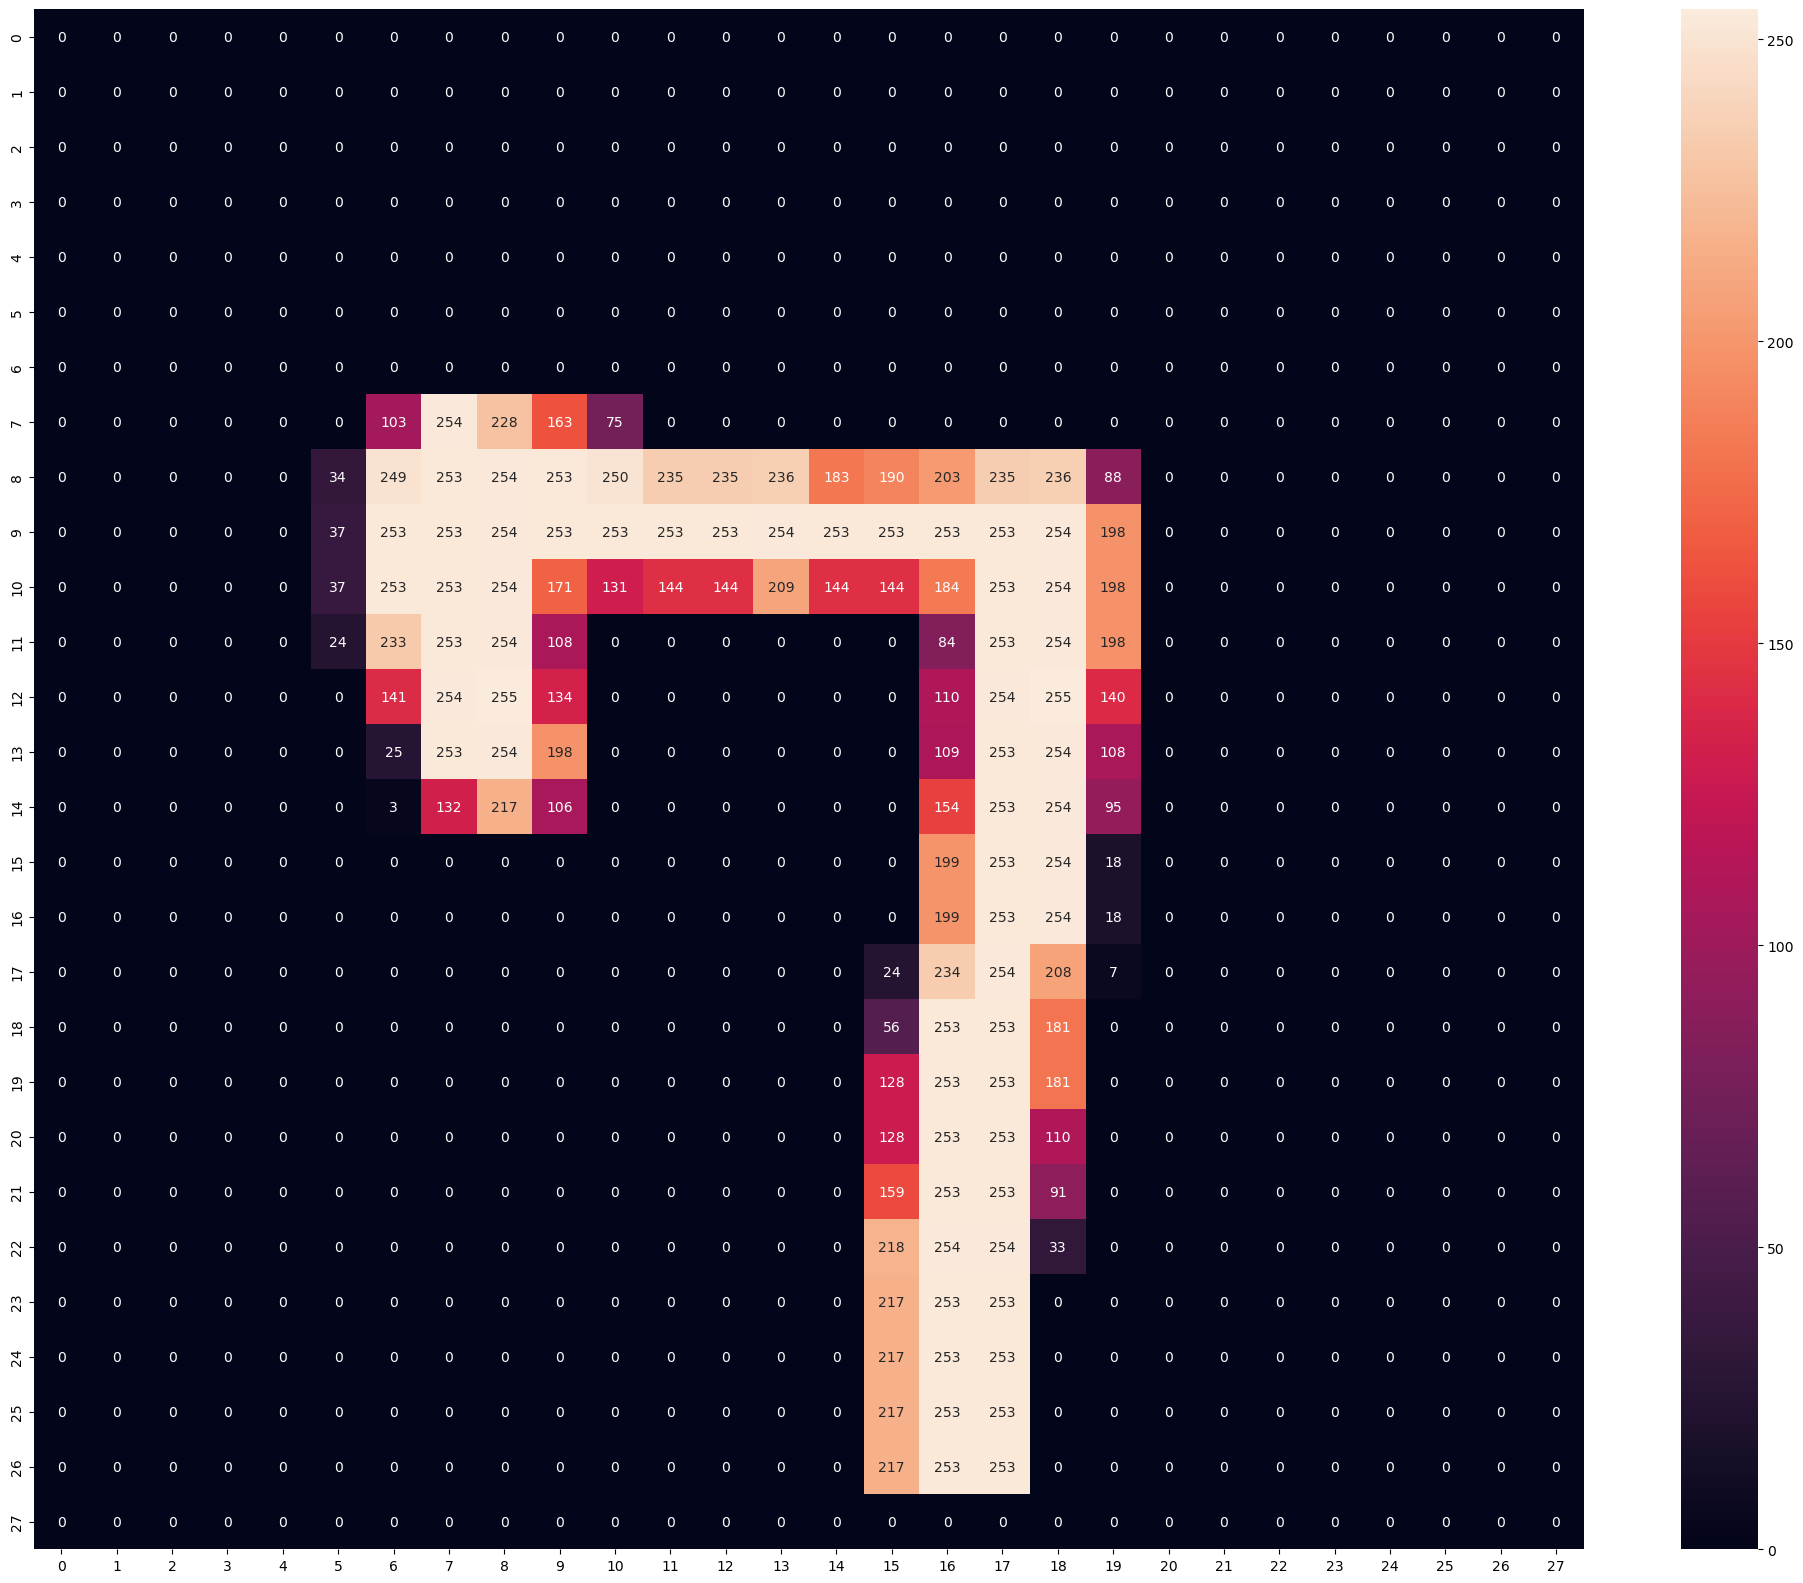

In [9]:
import seaborn as sns
plt.figure(figsize=(25, 20))
sns.heatmap(x_train[image_index], annot=True, fmt= '.3g')
plt.show()

In [10]:
x_train = x_train.reshape(60_000, 784)
x_test = x_test.reshape(10_000, 784)

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
from collections import Counter
Counter(y_train)

Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

In [13]:
from keras.utils import to_categorical

In [14]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [15]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [17]:
model = Sequential()

#input layer
model.add(Dense(input_dim= 784, units= 64, activation= 'relu'))
model.add(Dropout(0.2))

#hidden layer
model.add(Dense(units= 32, activation= 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units= 16, activation= 'relu'))
model.add(Dropout(0.2))

#output layer
model.add(Dense(units= 10, activation= 'softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer= SGD(learning_rate=1e-4),
              metrics= ['accuracy'])

In [18]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [19]:
es= EarlyStopping(monitor= 'val_loss', patience=5)
checkpoint= ModelCheckpoint(filepath= './checkpoint.h5',
                            save_best_only=True, 
                            save_weights_only=False
                           )

In [20]:
history= model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          callbacks= [es, checkpoint], 
          epochs= 50
         )

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 4.3946 - accuracy: 0.1122 - val_loss: 2.3024 - val_accuracy: 0.0988
Epoch 2/50
  97/1875 [>.............................] - ETA: 2s - loss: 2.5309 - accuracy: 0.1041

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 3s 2ms/step - loss: 2.4355 - accuracy: 0.1058 - val_loss: 2.3019 - val_accuracy: 0.0982
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3704 - accuracy: 0.1034 - val_loss: 2.3016 - val_accuracy: 0.1030
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3502 - accuracy: 0.1057 - val_loss: 2.3015 - val_accuracy: 0.1028
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3390 - accuracy: 0.1056 - val_loss: 2.3010 - val_accuracy: 0.1028
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3284 - accuracy: 0.1149 - val_loss: 2.2995 - val_accuracy: 0.1135
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3223 - accuracy: 0.1168 - val_loss: 2.2936 - val_accuracy: 0.1160
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3160 - accuracy: 0.1198 - val_loss: 2.2832 - val_accuracy: 0.1297
Epo

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

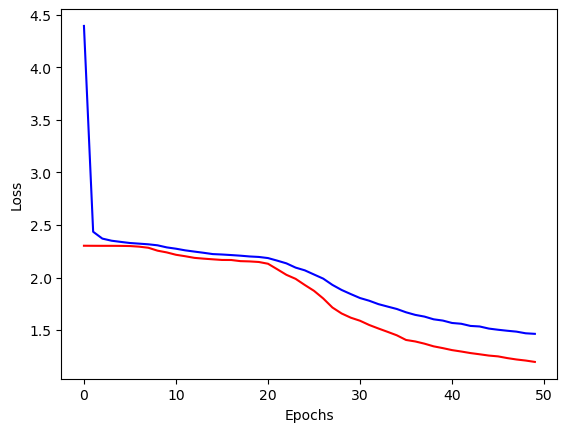

In [22]:
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(history.history['loss'], c= 'b')
plt.plot(history.history['val_loss'], c= 'r')

plt.show()

In [25]:
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 778us/step


In [27]:
from sklearn.metrics import classification_report

In [28]:
y_pred = y_pred.argmax(axis= 1)
y_test = y_test.argmax(axis= 1)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.95      0.44       980
           1       0.98      0.92      0.95      1135
           2       0.22      0.00      0.01      1032
           3       0.92      0.80      0.85      1010
           4       0.90      0.87      0.89       982
           5       0.16      0.01      0.01       892
           6       0.53      0.03      0.05       958
           7       0.93      0.87      0.90      1028
           8       0.44      0.83      0.57       974
           9       0.87      0.83      0.85      1009

    accuracy                           0.62     10000
   macro avg       0.62      0.61      0.55     10000
weighted avg       0.63      0.62      0.57     10000

